In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

C:\Users\dell\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\dell\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\dell\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\.libs\libopenblas.QVLO2T66WEPI7JZ63PS3HMOHFEY472BC.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [3]:
url ="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv"
df = pd.read_csv(url)
print("Data imported successfully")

Data imported successfully


In [4]:
df.shape


(346, 10)

In [5]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'loan_status', 'Principal', 'terms',
       'effective_date', 'due_date', 'age', 'education', 'Gender'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      346 non-null    int64 
 1   Unnamed: 0.1    346 non-null    int64 
 2   loan_status     346 non-null    object
 3   Principal       346 non-null    int64 
 4   terms           346 non-null    int64 
 5   effective_date  346 non-null    object
 6   due_date        346 non-null    object
 7   age             346 non-null    int64 
 8   education       346 non-null    object
 9   Gender          346 non-null    object
dtypes: int64(5), object(5)
memory usage: 27.2+ KB


In [7]:
df.describe()

,Unnamed: 0,Unnamed: 0.1,Principal,terms,age
count,346.000000,346.000000,346.000000,346.000000,346.000000
mean,202.167630,202.167630,943.641618,22.653179,30.939306
std,115.459715,115.459715,109.425530,7.991006,6.039418
min,0.000000,0.000000,300.000000,7.000000,18.000000
25%,107.250000,107.250000,900.000000,15.000000,27.000000
50%,204.500000,204.500000,1000.000000,30.000000,30.000000
75%,298.750000,298.750000,1000.000000,30.000000,35.000000
max,399.000000,399.000000,1000.000000,30.000000,51.000000


In [8]:
df.corr()

,Unnamed: 0,Unnamed: 0.1,Principal,terms,age
Unnamed: 0,1.000000,1.000000,0.032456,0.061522,-0.012264
Unnamed: 0.1,1.000000,1.000000,0.032456,0.061522,-0.012264
Principal,0.032456,0.032456,1.000000,0.521876,-0.060893
terms,0.061522,0.061522,0.521876,1.000000,-0.064762
age,-0.012264,-0.012264,-0.060893,-0.064762,1.000000


In [9]:
df.isnull().sum()

Unnamed: 0        0
Unnamed: 0.1      0
loan_status       0
Principal         0
terms             0
effective_date    0
due_date          0
age               0
education         0
Gender            0
dtype: int64

In [10]:
df.drop(columns=['Unnamed: 0','Unnamed: 0.1'],inplace=True)

# Converting to date time object

In [11]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Exploring the data 

In [12]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off their loan while 86 have gone for collection

In [13]:
df.groupby("Gender")['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86% female pay off their loans while only 73% of male do the same


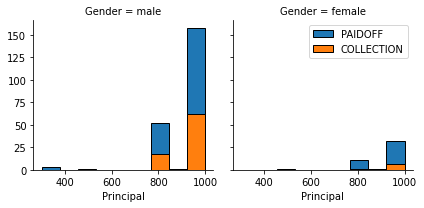

In [14]:
bins = np.linspace(df.Principal.min(), df.Principal.max(),10)
g = sns.FacetGrid( df,col="Gender", hue="loan_status", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

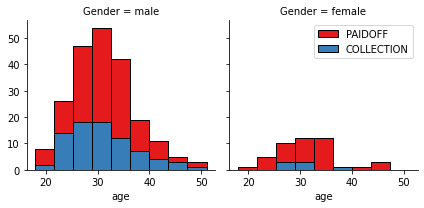

In [15]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

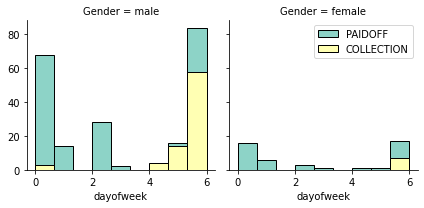

In [16]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set3", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

People who take loans at the end of the week are the ones with most not paid off

In [17]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


# Converting categorical data into numeric values 

In [18]:
gender_dictionary ={'male':0,'female':1}


In [19]:
df['Gender']=df['Gender'].map(gender_dictionary)
df['Gender']

0      0
1      1
2      0
3      1
4      0
      ..
341    0
342    0
343    0
344    0
345    0
Name: Gender, Length: 346, dtype: int64

In [20]:
loan_status_dictionary ={'COLLECTION':0,'PAIDOFF':1}

In [21]:
df['loan_status']=df['loan_status'].map(loan_status_dictionary)
df['loan_status']

0      1
1      1
2      1
3      1
4      1
      ..
341    0
342    0
343    0
344    0
345    0
Name: loan_status, Length: 346, dtype: int64

In [22]:
df.groupby(['education'])['loan_status'].value_counts(normalize = True)

education             loan_status
Bechalor              1              0.750000
                      0              0.250000
High School or Below  1              0.741722
                      0              0.258278
Master or Above       0              0.500000
                      1              0.500000
college               1              0.765101
                      0              0.234899
Name: loan_status, dtype: float64

In [23]:
df[['Principal','terms','age','Gender','education']].head()


,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


# One Hot Encoding


In [24]:
Feature = df[['Principal','terms','age','weekend','Gender']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()


,Principal,terms,age,weekend,Gender,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,0,1,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,1,0,0,0,1


In [25]:
X = Feature
X[0:5]

,Principal,terms,age,weekend,Gender,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,0,1,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,1,0,0,0,1


In [26]:
# output labels
y= df['loan_status']
y[0:5]

0    1
1    1
2    1
3    1
4    1
Name: loan_status, dtype: int64

# K Nearest Neighbor (KNN)

In [27]:
from sklearn.model_selection import train_test_split

from sklearn import preprocessing
X_train,X_test,y_train,y_test = train_test_split( X, y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)


Train set: (242, 8) (242,)
Test set: (104, 8) (104,)


Standardizing the data

In [28]:
X= preprocessing.StandardScaler().fit(X).transform(X).astype(float)
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -1.20577805, -0.42056004,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148, -1.20577805,  2.37778177,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -1.20577805, -0.42056004,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  0.82934003,  2.37778177,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 ,  0.82934003, -0.42056004,
        -0.38170062, -0.87997669,  1.14984679]])

In [29]:
from sklearn.neighbors import KNeighborsClassifier
# training the model and predicting
k=3
KNN_model = KNeighborsClassifier(n_neighbors = k)
KNN_model.fit(X_train,y_train)
y_kmeans = KNN_model.predict(X_train)
y_kmeans[0:5]

array([1, 1, 1, 1, 1], dtype=int64)

Minimum error:- 0.25 at K = 16


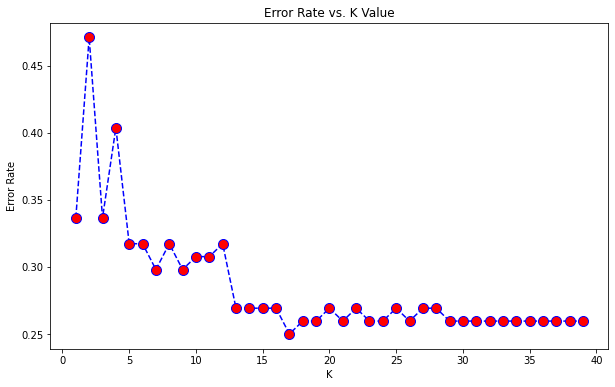

In [30]:
# finding best k
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))



In [31]:
from sklearn.neighbors import KNeighborsClassifier
k = 16
#Train Model and Predict  
kNN_model = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
y_kmeans = kNN_model.predict(X_train)
y_kmeans[0:5]

array([1, 1, 1, 1, 1], dtype=int64)

# Decision Tree Classifier

In [32]:

from sklearn.tree import DecisionTreeClassifier

DT_model = DecisionTreeClassifier(criterion = "entropy")
DT_model.fit(X_train,y_train)
yDT= DT_model.predict(X_train)
yDT[0:5]


array([1, 1, 1, 0, 1], dtype=int64)

# Logistic Regression


In [33]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(C=0.01)
logistic_model.fit(X_train,y_train)
y_log = logistic_model.predict(X_train)
y_log[0:5]

array([1, 1, 1, 1, 1], dtype=int64)

# Support Vector Machine

In [34]:
from sklearn import svm
SVM_model = svm.SVC()
SVM_model.fit(X_train,y_train)
y_svm = SVM_model.predict(X_train)
y_svm[0:5]

array([1, 1, 1, 1, 1], dtype=int64)

# Model evaluation using test set

In [35]:
url1 = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv"
test_df = pd.read_csv(url1)
print("Data imported")

Data imported


In [36]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [37]:
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [38]:
# Preprocessing
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek
test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
test_df['Gender']=test_df['Gender'].map(gender_dictionary)
test_df['loan_status']=test_df['loan_status'].map(loan_status_dictionary)
test_Feature = test_df[['Principal','terms','age','Gender','weekend']]
test_Feature = pd.concat([test_Feature,pd.get_dummies(test_df['education'])], axis=1)
test_Feature.drop(['Master or Above'], axis = 1,inplace=True)
test_x = test_Feature
test_X = preprocessing.StandardScaler().fit(test_Feature).transform(test_Feature)
test_Feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,50,1,0,1,0,0
1,300,7,35,0,1,0,0,0
2,1000,30,43,1,1,0,1,0
3,1000,30,26,0,1,0,0,1
4,800,15,29,0,1,1,0,0


In [39]:
test_y =test_df['loan_status'].values
test_y[0:5]

array([1, 1, 1, 1, 1], dtype=int64)

In [40]:
test_y.shape

(54,)

In [41]:
#KNN model
knn_y =knn.predict(test_X)
print("KNN F1-score: %.2f" % f1_score(test_y, knn_y, average='weighted') )
print("KNN Accuracy score: %.2f" % accuracy_score(test_y, knn_y) )


KNN F1-score: 0.63
KNN Accuracy score: 0.74


In [42]:
#Decision Tree
dt_y =DT_model.predict(test_X)
print("Decision Tree F1-score: %.2f" % f1_score(test_y, dt_y, average='weighted') )
print("Decision Tree Accuracy score: %.2f" % accuracy_score(test_y, dt_y) )


Decision Tree F1-score: 0.63
Decision Tree Accuracy score: 0.74


In [43]:
#Logistic regression
logistic_y =logistic_model.predict(test_X)
print("Logistic Regression F1-score: %.2f" % f1_score(test_y, logistic_y, average='weighted') )
print("Logistic Regression Accuracy score: %.2f" % accuracy_score(test_y, logistic_y) )


Logistic Regression F1-score: 0.63
Logistic Regression Accuracy score: 0.65


In [44]:
#SVM
svm_y =SVM_model.predict(test_X)
print("SVM F1-score: %.2f" % f1_score(test_y, svm_y, average='weighted') )
print("SVM Accuracy score: %.2f" % accuracy_score(test_y, svm_y) )


SVM F1-score: 0.63
SVM Accuracy score: 0.74


 |Algorithm|      |F1 Score|       |Accuracy|
|---------|      |--------|       |--------|
|KNN      |      |  0.63  |       |   74%  |
|Decision Tree|  |  0.63  |       |   74%  |
|Logistic Regression||0.63|       |   65%  |
|SVM|            |  0.63  ||74%|